In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
angle = ctrl.Antecedent(np.arange(-10, 11, 1), 'angle')
angular_velocity = ctrl.Antecedent(np.arange(-10, 11, 1), 'angular_velocity')
push = ctrl.Consequent(np.arange(-10, 11, 1), 'push')

angle['left']=fuzz.trimf(angle.universe, [-10, -10, 0])
angle['center']=fuzz.trimf(angle.universe, [-10, 0, 10])
angle['right']=fuzz.trimf(angle.universe, [0, 10, 10])

angular_velocity['left']=fuzz.trimf(angular_velocity.universe, [-10, -10, 0])
angular_velocity['center']=fuzz.trimf(angular_velocity.universe, [-10, 0, 10])
angular_velocity['right']=fuzz.trimf(angular_velocity.universe, [0, 10, 10])


push['l_push_l'] = fuzz.trimf(push.universe, [-10, -10, -5])
push['s_push_l'] = fuzz.trimf(push.universe, [-5, 0, 0])
push['d_push'] = fuzz.trimf(push.universe, [-10,0,10])
push['s_push_r'] = fuzz.trimf(push.universe, [0, 0, 5])
push['l_push_r'] = fuzz.trimf(push.universe, [5, 10, 10])

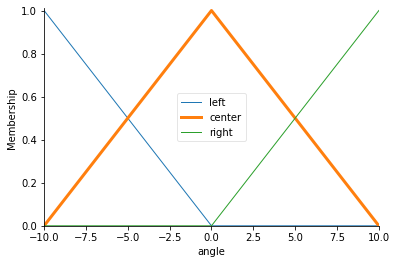

In [3]:
angle['center'].view()

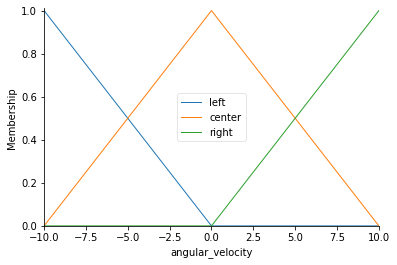

In [4]:
angular_velocity.view()

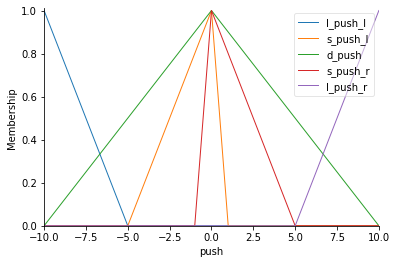

In [5]:
push.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

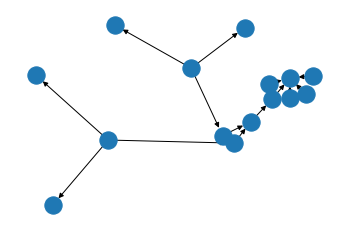

In [6]:
rule1 = ctrl.Rule(angle['left'] & angular_velocity['left'], push['l_push_r'])
rule2 = ctrl.Rule(angle['left']&angular_velocity['center'], push['s_push_r'])
rule3 = ctrl.Rule(angle['left'] & angular_velocity['right'], push['d_push'])
rule4 = ctrl.Rule(angle['center'] & angular_velocity['left'], push['s_push_r'])
rule5 = ctrl.Rule(angle['center']&angular_velocity['center'], push['d_push'])
rule6 = ctrl.Rule(angle['center'] & angular_velocity['right'], push['s_push_l'])
rule7 = ctrl.Rule(angle['right'] & angular_velocity['left'], push['d_push'])
rule8 = ctrl.Rule(angle['right']&angular_velocity['center'], push['s_push_l'])
rule9 = ctrl.Rule(angle['right'] & angular_velocity['right'], push['l_push_l'])

rule1.view()

In [7]:
problem_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4, rule5, rule6,rule7, rule8, rule9])

In [8]:
solve = ctrl.ControlSystemSimulation(problem_ctrl)

3.41162283608772e-16


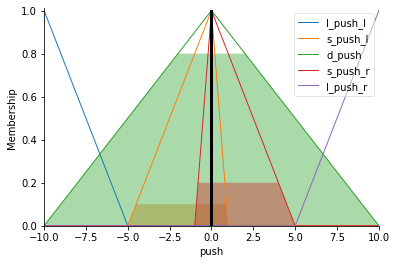

In [9]:
solve.input['angle'] = -9
solve.input['angular_velocity'] = 8

solve.compute()

print(solve.output['push'])
push.view(sim=solve)